# Importing Required libaries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from datetime import datetime,timedelta

import warnings
warnings.simplefilter("ignore")

# Read the Data:

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/Datasets/Hourly Energy Consumption/EKPC_hourly.csv")

df

,Datetime,EKPC_MW
0,2013-12-31 01:00:00,1861.0
1,2013-12-31 02:00:00,1835.0
2,2013-12-31 03:00:00,1841.0
3,2013-12-31 04:00:00,1872.0
4,2013-12-31 05:00:00,1934.0
...,...,...
45329,2018-01-01 20:00:00,2866.0
45330,2018-01-01 21:00:00,2846.0
45331,2018-01-01 22:00:00,2883.0
45332,2018-01-01 23:00:00,2880.0


# Data Description:

In [ ]:
df.head(10)

,Datetime,EKPC_MW
0,2013-12-31 01:00:00,1861.0
1,2013-12-31 02:00:00,1835.0
2,2013-12-31 03:00:00,1841.0
3,2013-12-31 04:00:00,1872.0
4,2013-12-31 05:00:00,1934.0
5,2013-12-31 06:00:00,1995.0
6,2013-12-31 07:00:00,2101.0
7,2013-12-31 08:00:00,2186.0
8,2013-12-31 09:00:00,2180.0
9,2013-12-31 10:00:00,2090.0


In [ ]:
df.tail(10)

,Datetime,EKPC_MW
45324,2018-01-01 15:00:00,2369.0
45325,2018-01-01 16:00:00,2352.0
45326,2018-01-01 17:00:00,2408.0
45327,2018-01-01 18:00:00,2594.0
45328,2018-01-01 19:00:00,2739.0
45329,2018-01-01 20:00:00,2866.0
45330,2018-01-01 21:00:00,2846.0
45331,2018-01-01 22:00:00,2883.0
45332,2018-01-01 23:00:00,2880.0
45333,2018-01-02 00:00:00,2846.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45334 entries, 0 to 45333
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  45334 non-null  object 
 1   EKPC_MW   45334 non-null  float64
dtypes: float64(1), object(1)
memory usage: 708.5+ KB


# Data Cleaning:

In [ ]:
df.isnull().sum()

Datetime    0
EKPC_MW     0
dtype: int64

In [ ]:
df["Datetime"]=pd.to_datetime(df["Datetime"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45334 entries, 0 to 45333
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  45334 non-null  datetime64[ns]
 1   EKPC_MW   45334 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 708.5 KB


In [ ]:
df.set_index("Datetime",inplace=True)

In [ ]:
df.head(5)

,EKPC_MW
Datetime,
2013-12-31 01:00:00,1861.0
2013-12-31 02:00:00,1835.0
2013-12-31 03:00:00,1841.0
2013-12-31 04:00:00,1872.0
2013-12-31 05:00:00,1934.0


<Axes: xlabel='Datetime'>

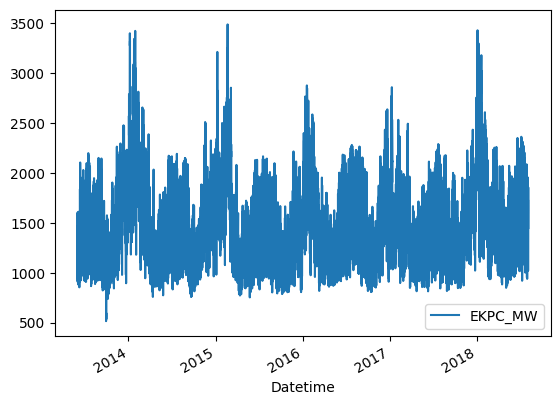

In [ ]:
df.plot()  # It is a stationery data...

# Hypothesis Testing:

In [ ]:
def adf_test(series):
  result=adfuller(series)
  print("ADF statstics:{}".format(result[0]))
  print("P value:{}".format(result[1]))
  if result[1]<=0.05:
    print("strong evidence against null hypothesis,Reject Null hypothesis,zero unit root,Data is stationery")
  else:
    print("Weak evidence against null hypothesis,accepts Null hypothesis,Unit root,Data is not stationery")

In [ ]:
adf_test(df["EKPC_MW"])

ADF statstics:-11.716478866249021
P value:1.447180816488948e-21
strong evidence against null hypothesis,Reject Null hypothesis,zero unit root,Data is stationery


In [ ]:
# Using Differencing:::  First Differecing..
df["EKPCMW_first_difference"]=df["EKPC_MW"]-df["EKPC_MW"].shift(1)

In [ ]:
df.head(5)

,EKPC_MW,EKPCMW_first_difference
Datetime,,
2013-12-31 01:00:00,1861.0,NaN
2013-12-31 02:00:00,1835.0,-26.0
2013-12-31 03:00:00,1841.0,6.0
2013-12-31 04:00:00,1872.0,31.0
2013-12-31 05:00:00,1934.0,62.0


In [ ]:
adf_test(df["EKPCMW_first_difference"].dropna())

ADF statstics:-27.298891630670433
P value:0.0
strong evidence against null hypothesis,Reject Null hypothesis,zero unit root,Data is stationery


In [ ]:
# Second Differecing....
df["EKPCMW_Second_Differeing"]=df["EKPCMW_first_difference"]-df["EKPCMW_first_difference"].shift(1)

In [ ]:
df.head(5)

,EKPC_MW,EKPCMW_first_difference,EKPCMW_Second_Differeing
Datetime,,,
2013-12-31 01:00:00,1861.0,NaN,NaN
2013-12-31 02:00:00,1835.0,-26.0,NaN
2013-12-31 03:00:00,1841.0,6.0,32.0
2013-12-31 04:00:00,1872.0,31.0,25.0
2013-12-31 05:00:00,1934.0,62.0,31.0


In [ ]:
adf_test(df["EKPCMW_Second_Differeing"].dropna())

ADF statstics:-62.82789065994599
P value:0.0
strong evidence against null hypothesis,Reject Null hypothesis,zero unit root,Data is stationery


In [ ]:
# Using Differeing for 5 shift...
df["EKPCMW_Five_Differecing"]=df["EKPC_MW"]-df["EKPC_MW"].shift(5)

In [ ]:
df.head(5)

,EKPC_MW,EKPCMW_first_difference,EKPCMW_Second_Differeing,EKPCMW_Five_Differecing
Datetime,,,,
2013-12-31 01:00:00,1861.0,NaN,NaN,NaN
2013-12-31 02:00:00,1835.0,-26.0,NaN,NaN
2013-12-31 03:00:00,1841.0,6.0,32.0,NaN
2013-12-31 04:00:00,1872.0,31.0,25.0,NaN
2013-12-31 05:00:00,1934.0,62.0,31.0,NaN


In [ ]:
adf_test(df["EKPCMW_Five_Differecing"].dropna())

ADF statstics:-25.558065939811932
P value:0.0
strong evidence against null hypothesis,Reject Null hypothesis,zero unit root,Data is stationery


# Plotting  Autocorrelation Partial Autocorrelation...

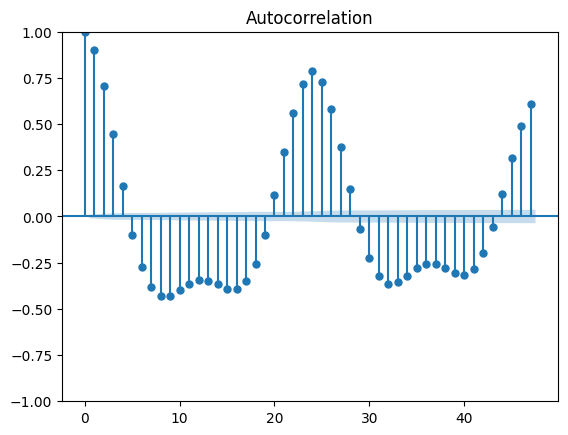

In [ ]:
# To find q value:
acf_plot=plot_acf(df["EKPCMW_Five_Differecing"].dropna())

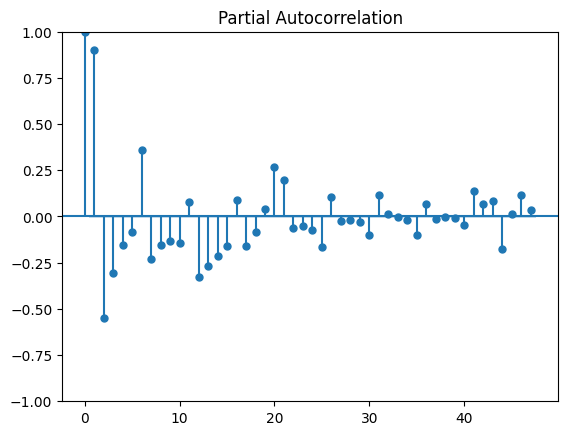

In [ ]:
# To find P value:
pacf=plot_pacf(df["EKPCMW_Five_Differecing"].dropna())

In [ ]:
df.head(5)

,EKPC_MW,EKPCMW_first_difference,EKPCMW_Second_Differeing,EKPCMW_Five_Differecing
Datetime,,,,
2013-12-31 01:00:00,1861.0,NaN,NaN,NaN
2013-12-31 02:00:00,1835.0,-26.0,NaN,NaN
2013-12-31 03:00:00,1841.0,6.0,32.0,NaN
2013-12-31 04:00:00,1872.0,31.0,25.0,NaN
2013-12-31 05:00:00,1934.0,62.0,31.0,NaN


In [ ]:
df.tail(5)

,EKPC_MW,EKPCMW_first_difference,EKPCMW_Second_Differeing,EKPCMW_Five_Differecing
Datetime,,,,
2018-01-01 20:00:00,2866.0,127.0,-18.0,497.0
2018-01-01 21:00:00,2846.0,-20.0,-147.0,494.0
2018-01-01 22:00:00,2883.0,37.0,57.0,475.0
2018-01-01 23:00:00,2880.0,-3.0,-40.0,286.0
2018-01-02 00:00:00,2846.0,-34.0,-31.0,107.0


# Splitting Training & Testing Data..

In [ ]:
train_dataset_end=datetime(2014,12,1)
test_dataset_end=datetime(2015,1,1)

In [ ]:
train_data=df[:train_dataset_end]
train_data

,EKPC_MW,EKPCMW_first_difference,EKPCMW_Second_Differeing,EKPCMW_Five_Differecing
Datetime,,,,
2013-12-31 01:00:00,1861.0,NaN,NaN,NaN
2013-12-31 02:00:00,1835.0,-26.0,NaN,NaN
2013-12-31 03:00:00,1841.0,6.0,32.0,NaN
2013-12-31 04:00:00,1872.0,31.0,25.0,NaN
2013-12-31 05:00:00,1934.0,62.0,31.0,NaN
...,...,...,...,...
2014-11-30 20:00:00,1390.0,-5.0,-36.0,193.0
2014-11-30 21:00:00,1386.0,-4.0,1.0,194.0
2014-11-30 22:00:00,1289.0,-97.0,-93.0,44.0


In [ ]:
test_data=df[:test_dataset_end]
test_data

,EKPC_MW,EKPCMW_first_difference,EKPCMW_Second_Differeing,EKPCMW_Five_Differecing
Datetime,,,,
2013-12-31 01:00:00,1861.0,NaN,NaN,NaN
2013-12-31 02:00:00,1835.0,-26.0,NaN,NaN
2013-12-31 03:00:00,1841.0,6.0,32.0,NaN
2013-12-31 04:00:00,1872.0,31.0,25.0,NaN
2013-12-31 05:00:00,1934.0,62.0,31.0,NaN
...,...,...,...,...
2014-12-31 20:00:00,2083.0,-2.0,-96.0,394.0
2014-12-31 21:00:00,2044.0,-39.0,-37.0,344.0
2014-12-31 22:00:00,2086.0,42.0,81.0,296.0


In [ ]:
# prediction:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

# ARIMA Model:

In [ ]:
model=sms.tsa.arima.ARIMA(train_data["EKPC_MW"],order=(30,0,47))

In [ ]:
model_ARIMA_fit=model.fit()

In [ ]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                EKPC_MW   No. Observations:                 5903
Model:               ARIMA(30, 0, 47)   Log Likelihood              -32461.670
Date:                Wed, 13 Sep 2023   AIC                          65081.340
Time:                        09:07:37   BIC                          65609.314
Sample:                             0   HQIC                         65264.840
                               - 5903                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1440.3634     65.840     21.877      0.000    1311.320    1569.407
ar.L1          0.9389      1.200      0.782      0.434      -1.413       3.291
ar.L2          0.5048      1.543      0.327      0.744      -2.519       3.529
ar.L3         -0.9691      0.342     -2.837      0.005      -1.639      -0.300
ar.L4          0.3108      1.330      0.234      0.815      -2.295       2.917
ar.L5          0.6972      0.751      0.929      0.353      -0.774       2.168
ar.L6         -0.6848      0.736     -0.930      0.352      -2.128       0.758
ar.L7         -0.4353      1.154     -0.377      0.706      -2.698       1.827
ar.L8          0.6599      0.349      1.892      0.058      -0.024       1.343
ar.L9          0.0993      1.044      0.095      0.924      -1.946       2.145
ar.L10        -0.7581      0.336     -2.253      0.024      -1.418      -0.099
ar.L11         0.3848      0.953      0.404      0.686      -1.483       2.252
ar.L12         0.6800      0.882      0.771      0.441      -1.049       2.409
ar.L13        -0.6763      0.599     -1.129      0.259      -1.851       0.498
ar.L14        -0.2121      1.111     -0.191      0.849      -2.390       1.966
ar.L15         0.6922      0.254      2.725      0.006       0.194       1.190
ar.L16        -0.2666      0.886     -0.301      0.763      -2.002       1.469
ar.L17        -0.6626      0.684     -0.969      0.333      -2.003       0.678
ar.L18         0.3660      0.632      0.579      0.563      -0.873       1.605
ar.L19         0.6756      0.748      0.903      0.367      -0.791       2.142
ar.L20        -0.6127      0.617     -0.994      0.320      -1.821       0.596
ar.L21        -0.1599      0.979     -0.163      0.870      -2.078       1.758
ar.L22         0.8309      0.190      4.372      0.000       0.458       1.203
ar.L23        -0.3096      0.955     -0.324      0.746      -2.181       1.562
ar.L24        -0.2061      0.695     -0.297      0.767      -1.568       1.156
ar.L25         0.1614      0.104      1.550      0.121      -0.043       0.365
ar.L26        -0.1854      0.240     -0.771      0.440      -0.656       0.286
ar.L27        -0.0229      0.288     -0.080      0.937      -0.588       0.542
ar.L28         0.2224      0.075      2.969      0.003       0.076       0.369
ar.L29        -0.0994      0.298     -0.334      0.738      -0.683       0.484
ar.L30         0.0104      0.177      0.059      0.953      -0.336       0.357
ma.L1          0.0843      1.200      0.070      0.944      -2.269       2.437
ma.L2         -0.4410      0.402     -1.098      0.272      -1.228       0.346
ma.L3          0.4757      0.617      0.771      0.441      -0.733       1.685
ma.L4          0.1693      0.680      0.249      0.803      -1.163       1.501
ma.L5         -0.5242      0.190     -2.757      0.006      -0.897      -0.152
ma.L6          0.1027      0.727      0.141      0.888      -1.323       1.528
ma.L7          0.5381      0.382      1.409      0.159      -0.210       1.287
ma

# Prediction:

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2013-12-31 01:00:00
2015-01-01 00:00:00


In [ ]:
pred=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)

In [ ]:
pred

Datetime
2013-12-31 01:00:00    1440.363382
2013-12-31 02:00:00    1846.591619
2013-12-31 03:00:00    1806.146389
2013-12-31 04:00:00    1817.089459
2013-12-31 05:00:00    1857.953919
                          ...     
2014-12-31 20:00:00    2028.315149
2014-12-31 21:00:00    2049.476425
2014-12-31 22:00:00    2010.503583
2014-12-31 23:00:00    1969.453678
2015-01-01 00:00:00    1979.689267
Name: predicted_mean, Length: 5159, dtype: float64

In [ ]:
residuals=df["EKPC_MW"]-pred

In [ ]:
residuals

Datetime
2013-06-01 01:00:00    131.035069
2013-06-01 02:00:00      5.222220
2013-06-01 03:00:00    -17.776504
2013-06-01 04:00:00     35.038255
2013-06-01 05:00:00    -60.318644
                          ...    
2018-08-02 20:00:00           NaN
2018-08-02 21:00:00           NaN
2018-08-02 22:00:00           NaN
2018-08-02 23:00:00           NaN
2018-08-03 00:00:00           NaN
Length: 45334, dtype: float64

<Axes: ylabel='Density'>

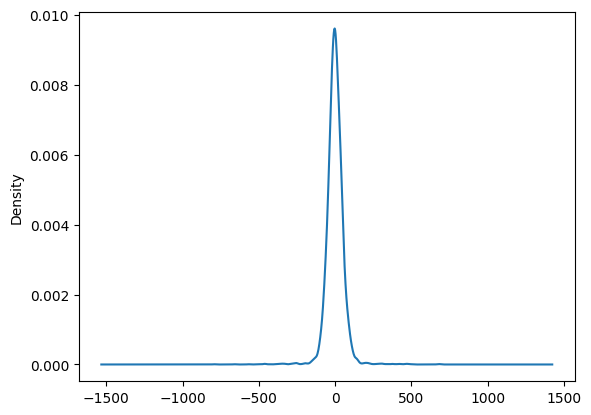

In [ ]:
model_ARIMA_fit.resid.plot(kind="kde")

In [ ]:
test_data["Predicted_ARIMA"]=pred

<Axes: xlabel='Datetime'>

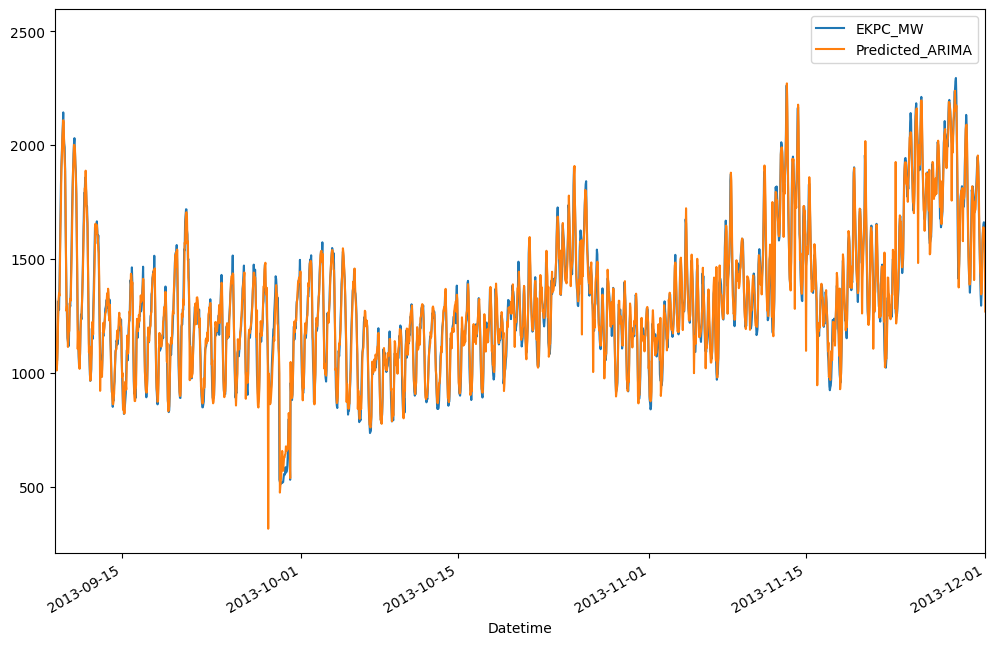

In [ ]:
test_data[["EKPC_MW","Predicted_ARIMA"]].plot(xlim=["2013-09-09","2013-12-01"],figsize=(12,8))

In [ ]:
test_data.head(10)

,EKPC_MW,EKPCMW_first_difference,EKPCMW_Second_Differeing,EKPCMW_Five_Differecing,Predicted_ARIMA
Datetime,,,,,
2013-12-31 01:00:00,1861.0,NaN,NaN,NaN,1440.363382
2013-12-31 02:00:00,1835.0,-26.0,NaN,NaN,1846.591619
2013-12-31 03:00:00,1841.0,6.0,32.0,NaN,1806.146389
2013-12-31 04:00:00,1872.0,31.0,25.0,NaN,1817.089459
2013-12-31 05:00:00,1934.0,62.0,31.0,NaN,1857.953919
2013-12-31 06:00:00,1995.0,61.0,-1.0,134.0,1932.452289
2013-12-31 07:00:00,2101.0,106.0,45.0,266.0,1998.238713
2013-12-31 08:00:00,2186.0,85.0,-21.0,345.0,2117.985861
2013-12-31 09:00:00,2180.0,-6.0,-91.0,308.0,2197.345980


In [ ]:
test_data.tail(10)

,EKPC_MW,EKPCMW_first_difference,EKPCMW_Second_Differeing,EKPCMW_Five_Differecing,Predicted_ARIMA
Datetime,,,,,
2014-12-31 15:00:00,1689.0,-132.0,-36.0,-486.0,1797.701692
2014-12-31 16:00:00,1700.0,11.0,143.0,-375.0,1658.818095
2014-12-31 17:00:00,1790.0,90.0,79.0,-202.0,1677.557239
2014-12-31 18:00:00,1991.0,201.0,111.0,74.0,1788.087066
2014-12-31 19:00:00,2085.0,94.0,-107.0,264.0,1980.174001
2014-12-31 20:00:00,2083.0,-2.0,-96.0,394.0,2028.315149
2014-12-31 21:00:00,2044.0,-39.0,-37.0,344.0,2049.476425
2014-12-31 22:00:00,2086.0,42.0,81.0,296.0,2010.503583
2014-12-31 23:00:00,2019.0,-67.0,-109.0,28.0,1969.453678
